In [124]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## Metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
## Models
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv(os.path.join(os.getcwd(),'Super_store.csv'),encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
for x in df.columns:
    n= df[x].nunique()
    print(f'{x} : {n}')

Row ID : 9994
Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# ETL

In [8]:
df['Cost']=-((df['Sales']-(df['Sales']*df['Discount']))-df['Profit'])
df['Product_Price']=df['Sales']/df['Quantity']

In [9]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%m/%d/%Y',errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%m/%d/%Y',errors='coerce')

In [10]:
df['Order Date'].iloc[254]

Timestamp('2015-11-28 00:00:00')

In [11]:
'%m/%d/%Y'

'%m/%d/%Y'

In [12]:
df['Ship Date'].iloc[298]-df['Order Date'].iloc[298]

Timedelta('6 days 00:00:00')

In [13]:
df['Delivery Time']=df['Ship Date']-df['Order Date']
df['Delivery Time']=df['Delivery Time'].astype('str')
df['Delivery Time']=df['Delivery Time'].apply(lambda x:x.split(' ')[0])
df['Delivery Time']=df['Delivery Time'].apply(lambda x:int(x))
df['Delivery Time']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Delivery Time, Length: 9994, dtype: int64

In [14]:
df['Order_Month']=df['Order Date'].dt.month_name()
df['Order_Day']=df['Order Date'].dt.day_name()


# Exploratory Data Analysis

## what is Most Frequent Product Name We Sale?

In [15]:
most_product_saled=df['Product Name'].value_counts(ascending=False)
most_5_products_in_sale=pd.DataFrame(most_product_saled[:5])
most_5_products_in_sale

,count
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19


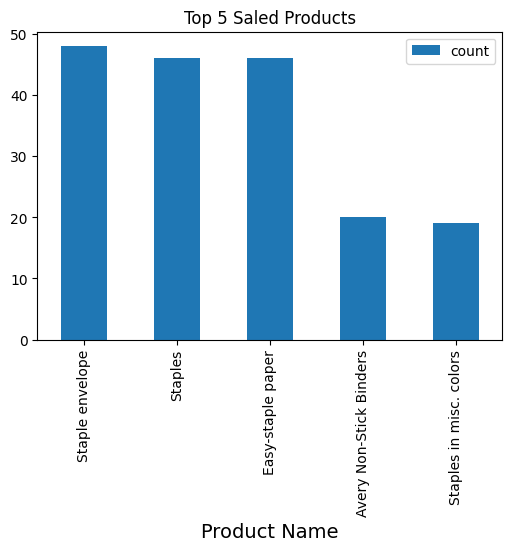

In [16]:

most_5_products_in_sale.plot(kind='bar',figsize=(6,4),title='Top 5 Saled Products')
plt.xlabel('Product Name',fontsize=14)
plt.show()

## Most Region,State and City Ordered

In [17]:
most_Region=df['Region'].value_counts()
top_Region=pd.DataFrame(most_Region)
top_Region



,count
Region,
West,3203
East,2848
Central,2323
South,1620


In [18]:
most_State=df['State'].value_counts()
top_15_State=pd.DataFrame(most_State[:15])
top_15_State

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [19]:
top_cities=df['City'].value_counts()
top_15_cities=pd.DataFrame(top_cities[:15])
top_15_cities

,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
Houston,377
Chicago,314
Columbus,222
San Diego,170


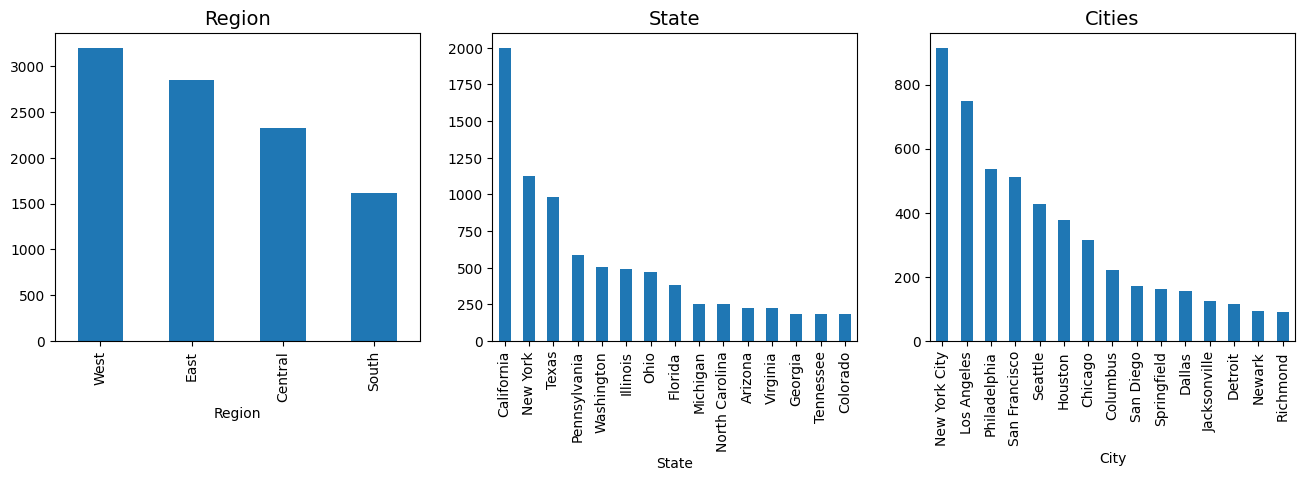

In [20]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
df['Region'].value_counts(ascending=False).plot(kind='bar')
plt.title('Region',fontsize=14)
plt.subplot(1,3,2)

df['State'].value_counts(ascending=False)[:15].plot(kind='bar')
plt.title('State',fontsize=14)

plt.subplot(1,3,3)
df['City'].value_counts(ascending=False)[:15].plot(kind='bar')
plt.title('Cities',fontsize=14)
plt.show()

## Most Discount Given To The Customers

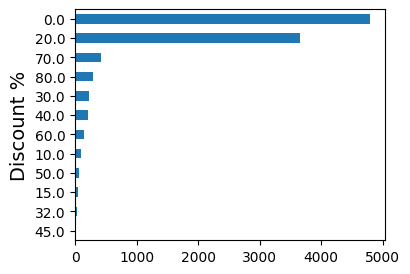

In [21]:
plt.figure(figsize=(4,3))
(df['Discount']*100).value_counts(ascending=True).plot(kind='barh')
plt.ylabel('Discount %',fontsize=14)
plt.show()

## What is The Most Sold Category & Sub-Category?

In [22]:
most_Cat=df['Category'].value_counts()
Most_category=pd.DataFrame(most_Cat)
Most_category

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


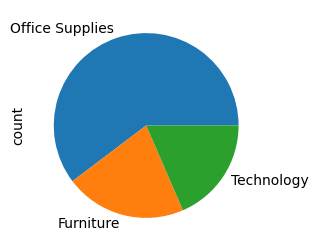

In [23]:
plt.figure(figsize=(4,3))
df['Category'].value_counts().plot(kind='pie')
plt.show()


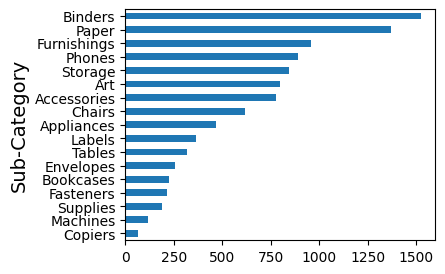

In [24]:
plt.figure(figsize=(4,3))

df['Sub-Category'].value_counts(ascending=True).plot(kind='barh')
plt.ylabel('Sub-Category',fontsize=14)
plt.show()

* >'Wow it seems that ['Binders','Paper','Furnishings'] Categories are Buying well on the other hand ['Supplies','Machines','Copiers'] need more improvement in  their Qyality or Markiting'

## Who is most Loyal Customer?

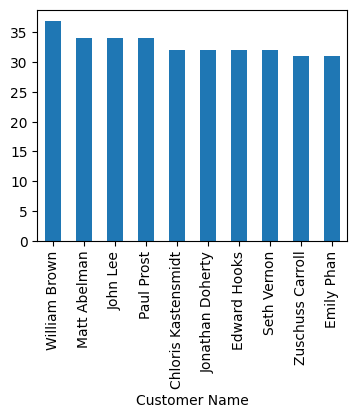

In [25]:
plt.figure(figsize=(4,3))
df['Customer Name'].value_counts()[:10].plot(kind='bar');


* >'I suggest to celebrate with our top Three Buyers Customers with something like full paid Vacatoin ,Discounts in Famous Restaurants or Free Products  '

## Day & Month When our Business flourish !

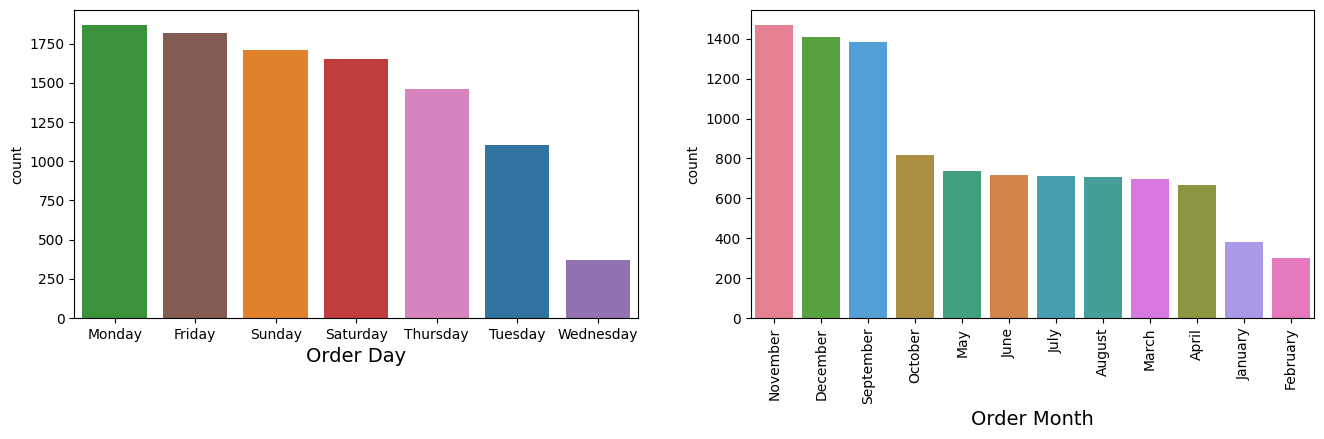

In [26]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df['Order_Day'],hue='Order_Day',order=df['Order_Day'].value_counts().index)
plt.xlabel('Order Day',fontsize=14)
plt.subplot(1,2,2)
sns.countplot(data=df,x=df['Order_Month'],hue='Order_Month',order=df['Order_Month'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Order Month',fontsize=14)
plt.show()

# Analysis in terms of Sales & Profit

## Sales-Profit ratio per Customer

In [27]:
Cus_Sal=df.groupby(df['Customer Name']).Sales.agg('sum').sort_values(ascending=False)
top_Cus_sales=pd.DataFrame(Cus_Sal)
top_Cus_sales

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Roy Skaria,22.328
Mitch Gastineau,16.739
Carl Jackson,16.520


In [28]:
Cus_Prof=df.groupby(df['Customer Name']).Profit.agg('sum').sort_values(ascending=False)
top_Cus_Profit=pd.DataFrame(Cus_Prof)
top_Cus_Profit

,Profit
Customer Name,
Tamara Chand,8981.3239
Raymond Buch,6976.0959
Sanjit Chand,5757.4119
Hunter Lopez,5622.4292
Adrian Barton,5444.8055
...,...
Henry Goldwyn,-2797.9635
Sharelle Roach,-3333.9144
Luke Foster,-3583.9770


In [29]:
Sales_Profit_ratio=pd.concat([top_Cus_sales,top_Cus_Profit],axis=1,ignore_index=True)
Sales_Profit_ratio

,0,1
Customer Name,,
Sean Miller,25043.050,-1980.7393
Tamara Chand,19052.218,8981.3239
Raymond Buch,15117.339,6976.0959
Tom Ashbrook,14595.620,4703.7883
Adrian Barton,14473.571,5444.8055
...,...,...
Roy Skaria,22.328,9.5838
Mitch Gastineau,16.739,-1.2453
Carl Jackson,16.520,1.6520


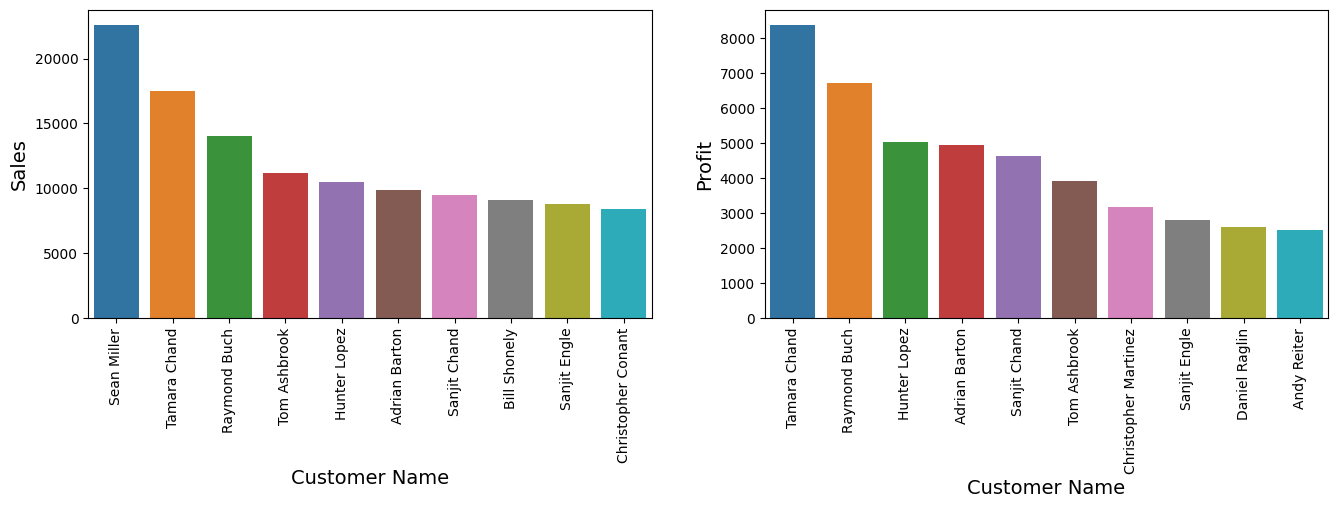

In [30]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
top_10_customer_Sales=df.sort_values('Sales',ascending=False)[:10]
sns.barplot(x='Customer Name',y='Sales',data=top_10_customer_Sales,hue='Customer Name')
plt.xlabel('Customer Name',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
top_10_Customer_Profit = df.sort_values('Profit',ascending=False)[:10]
sns.barplot(x='Customer Name',y='Profit',data=top_10_Customer_Profit,hue='Customer Name')
plt.xlabel('Customer Name',fontsize=14)
plt.ylabel('Profit',fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Most [Region,State,City] Sales & Profit 

In [31]:
Most_Region_sales=pd.DataFrame(df.groupby(df['Region']).Sales.agg('sum').sort_values(ascending=False))
Most_Region_sales

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


In [32]:
Most_Region_Profit=pd.DataFrame(df.groupby(df['Region']).Profit.agg('sum').sort_values(ascending=False))
Most_Region_Profit

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


Text(0.5, 0, 'Profit')

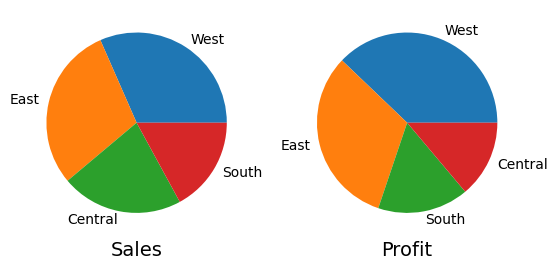

In [33]:
plt.subplot(1,2,1)
df.groupby(df['Region']).Sales.agg('sum').sort_values(ascending=False).plot(kind='pie')
plt.ylabel('',fontsize=14)
plt.xlabel('Sales',fontsize=14)
plt.subplot(1,2,2)
df.groupby(df['Region']).Profit.agg('sum').sort_values(ascending=False).plot(kind='pie')
plt.ylabel('',fontsize=14)
plt.xlabel('Profit',fontsize=14)

In [34]:
top_10_State_sales=pd.DataFrame(df.groupby('State').Sales.agg('sum').sort_values(ascending=False)[:10])
top_10_State_sales

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


In [35]:
top_10_State_Profit=pd.DataFrame(df.groupby('State').Profit.agg('sum').sort_values(ascending=False)[:10])
top_10_State_Profit

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


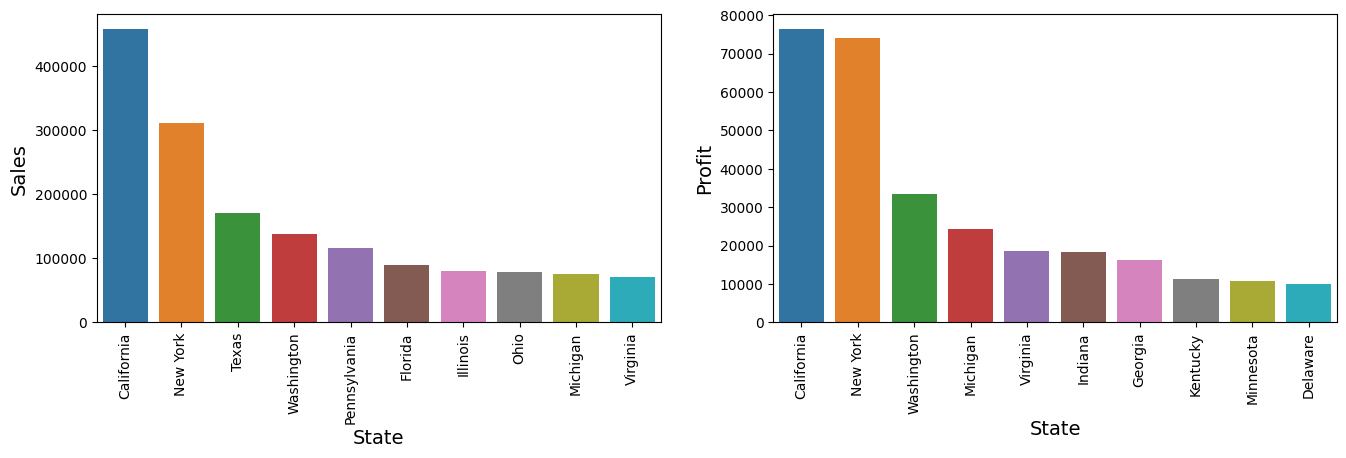

In [36]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

sns.barplot(x='State',y='Sales',data=top_10_State_sales,estimator=np.sum,hue='State')
plt.ylabel('Sales',fontsize=14)
plt.xlabel('State',fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1,2,2)

sns.barplot(x='State',y='Profit',data=top_10_State_Profit,estimator=np.sum,hue='State')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('State',fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [37]:
top_10_city_sales=pd.DataFrame(df.groupby('City').Sales.agg('sum').sort_values(ascending=False))[:10]
top_10_city_sales

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


In [38]:
top_10_city_Profit=pd.DataFrame(df.groupby('City').Profit.agg('sum').sort_values(ascending=False))[:10]
top_10_city_Profit

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


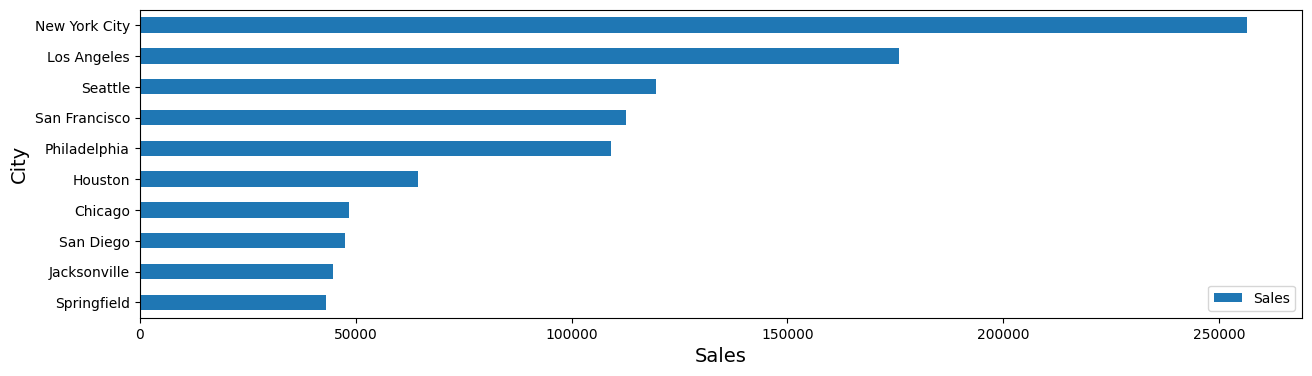

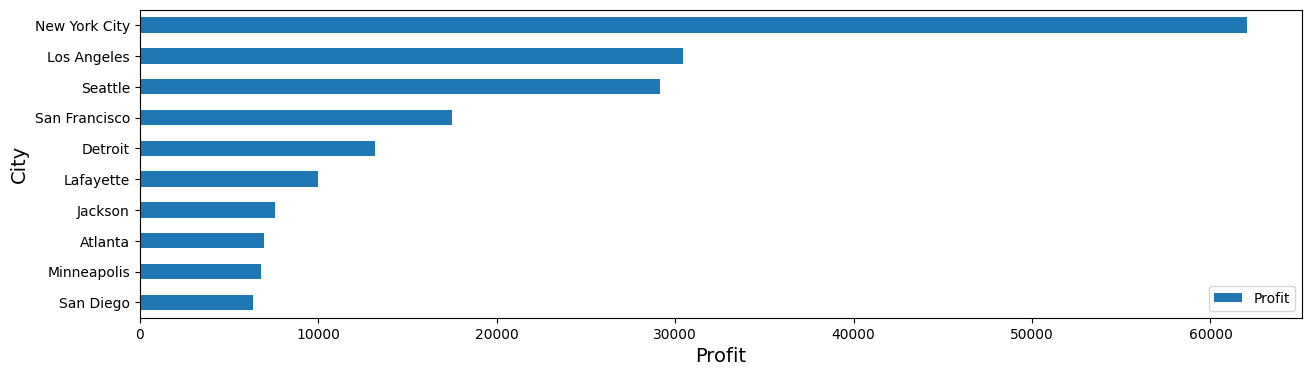

In [39]:
top_10_city_sales.sort_values('Sales',ascending=True).plot(kind='barh',figsize=(15,4))
plt.ylabel('City',fontsize=14)
plt.xlabel('Sales',fontsize=14)

top_10_city_Profit.sort_values('Profit',ascending=True).plot(kind='barh',figsize=(15,4))
plt.ylabel('City',fontsize=14)
plt.xlabel('Profit',fontsize=14)
plt.show()


## Which Segment is Profitable more?

In [40]:
Profitable_Segment=pd.DataFrame(df.groupby(df['Segment']).Profit.agg('sum').sort_values(ascending=False))
Profitable_Segment

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


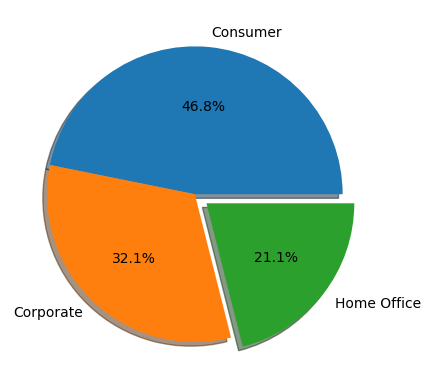

In [41]:
fig,ax=plt.subplots()
ax.pie(Profitable_Segment.values.squeeze(),labels=Profitable_Segment.index,autopct='%1.1f%%',explode=(0,0,0.1),shadow=True)
plt.show()

## Which Product We Sell & Profitable more?

In [42]:
top_10_product_sales=df.groupby(df['Product Name']).Sales.agg('sum').sort_values(ascending=False)[:10]
Top_10_product_sales=pd.DataFrame(top_10_product_sales)
Top_10_product_sales

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [43]:
top_10_product_Profit=df.groupby(df['Product Name']).Profit.agg('sum').sort_values(ascending=False)[:10]
Top_10_product_Profit=pd.DataFrame(top_10_product_Profit)
Top_10_product_Profit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


## Best Seller & Profitable Category and Sub-Category

In [44]:
best_Cat_sales=df.groupby(df['Category']).Sales.agg('sum').sort_values(ascending=False)
Best_cat_sales=pd.DataFrame(best_Cat_sales)
Best_cat_sales

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [45]:
best_Cat_Profit=df.groupby(df['Category']).Profit.agg('sum').sort_values(ascending=False)
Best_cat_Profit=pd.DataFrame(best_Cat_Profit)
Best_cat_Profit

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


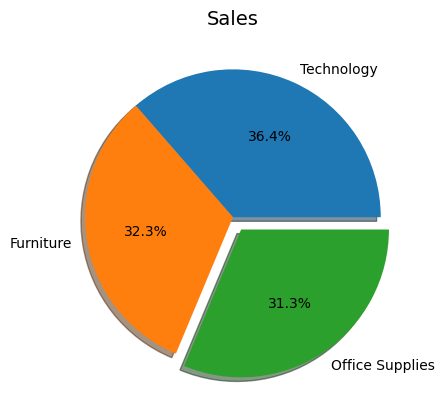

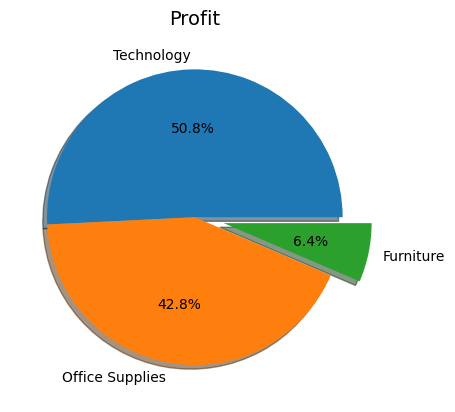

In [46]:

fig1,ax1=plt.subplots()
ax1.pie(Best_cat_sales.values.squeeze(),labels=Best_cat_sales.index,autopct='%1.1f%%',explode=(0,0,0.1),shadow=True);
plt.title('Sales',fontsize=14)

fig2,ax2=plt.subplots()
ax2.pie(Best_cat_Profit.values.squeeze(),labels=Best_cat_Profit.index,autopct='%1.1f%%',explode=(0,0,0.2),shadow=True);
plt.title('Profit',fontsize=14)

plt.show()

## Ship Mode By Sales and Average Delivery Time

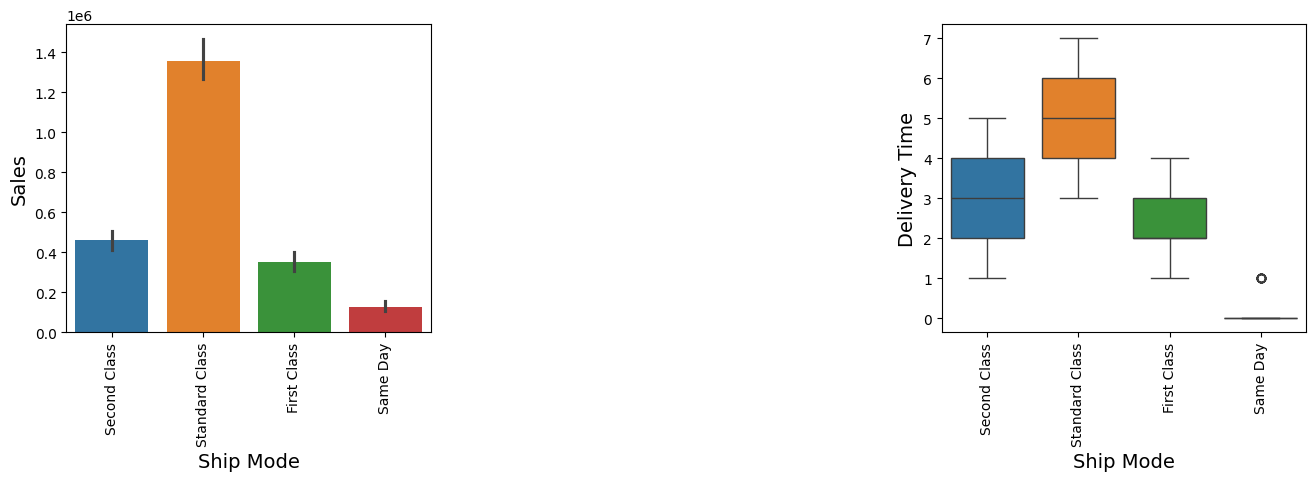

In [47]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.barplot(x='Ship Mode',y='Sales',data=df,estimator=np.sum,hue='Ship Mode')
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Ship Mode',fontsize=14)
plt.xticks(rotation=90)
plt.subplot(1,3,3)

sns.boxplot(x='Ship Mode',y='Delivery Time',data=df,hue='Ship Mode')
plt.ylabel('Delivery Time',fontsize=14)
plt.xlabel('Ship Mode',fontsize=14)
plt.xticks(rotation=90)
plt.show()


# Bivirate Analysis

## Profitable Category By Region

In [48]:
pd.pivot_table(index='Category',columns='Region',data=df,values='Profit',aggfunc='sum')

Region,Central,East,South,West
Category,,,,
Furniture,-2871.0494,3046.1658,6771.2061,11504.9503
Office Supplies,8879.9799,41014.5791,19986.3928,52609.8490
Technology,33697.4320,47462.0351,19991.8314,44303.6496


<Figure size 1600x400 with 0 Axes>

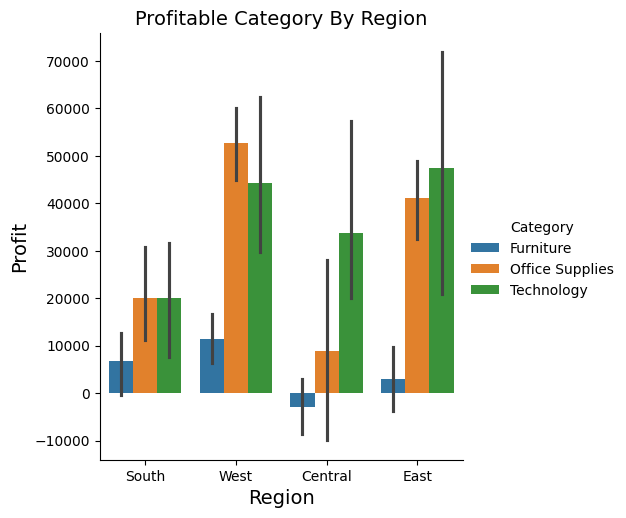

In [49]:
plt.figure(figsize=(16,4))
sns.catplot(x='Region',y='Profit',hue='Category',data=df,kind='bar',estimator=np.sum)
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Region',fontsize=14)
plt.title('Profitable Category By Region',fontsize=14)
plt.show()

## Best Seller Day By Category

In [50]:
pd.pivot_table(index='Order_Day',columns='Category',data=df,values='Sales',aggfunc='sum')


Category,Furniture,Office Supplies,Technology
Order_Day,,,
Friday,135657.2473,133993.278,158041.734
Monday,159826.6027,136498.705,132612.508
Saturday,102558.6280,123570.030,131856.025
Sunday,118428.4964,111351.911,155573.439
Thursday,107079.8935,102947.992,111937.893
Tuesday,85832.3452,89654.074,111723.083
Wednesday,32616.5822,21031.042,34409.351


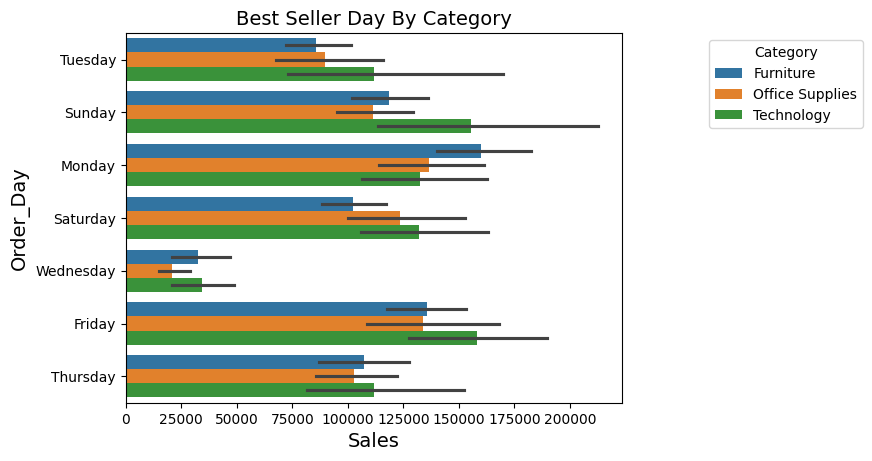

In [51]:
ax=sns.barplot(y='Order_Day',x='Sales',hue='Category',data=df,estimator=np.sum)
sns.move_legend(ax,'upper right',bbox_to_anchor=(1.5, 1))
plt.ylabel('Order_Day',fontsize=14)
plt.xlabel('Sales',fontsize=14)
plt.title('Best Seller Day By Category',fontsize=14)
plt.show()

## Profitable Ship Mode By Region

In [52]:
shipmode_region=pd.pivot_table(index='Ship Mode',columns='Region',data=df,values='Profit',aggfunc='sum')
shipmode_region

Region,Central,East,South,West
Ship Mode,,,,
First Class,3707.2672,15732.0141,6892.3854,22638.1732
Same Day,1531.8797,7980.2670,-1762.3350,8141.9472
Second Class,9114.8349,10787.2908,14667.1469,22877.3628
Standard Class,25352.3807,57023.2081,26952.2330,54760.9657


<Figure size 1600x400 with 0 Axes>

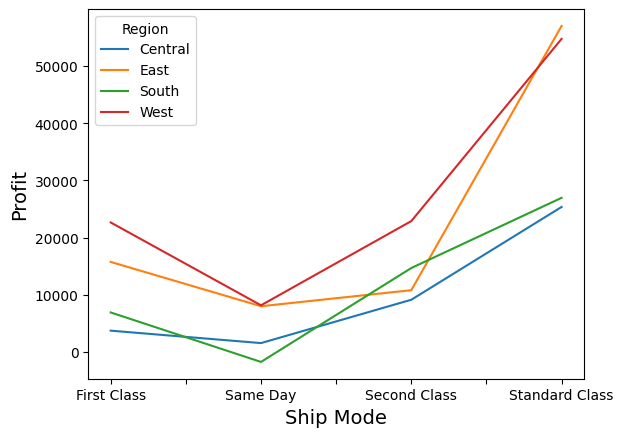

In [53]:
plt.figure(figsize=(16,4))

shipmode_region.plot(kind='line')
plt.xlabel('Ship Mode',fontsize=14)
plt.ylabel('Profit',fontsize=14)
plt.show()

## Best Seller Month By category 

<Figure size 1000x600 with 0 Axes>

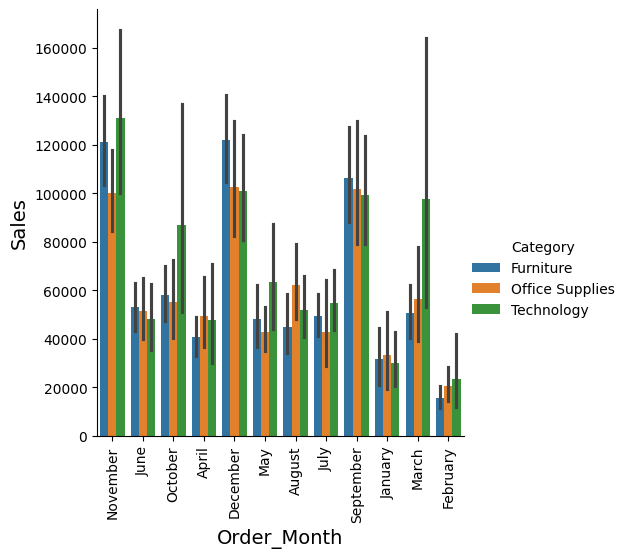

In [54]:
plt.figure(figsize=(10,6))
sns.catplot(x='Order_Month',y='Sales',data=df,hue='Category',kind='bar',estimator=np.sum)
plt.xticks(rotation=90)
plt.xlabel('Order_Month',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()

## Best Seller Sub-Category By Segment

In [55]:
Sales_SC_Seg=pd.pivot_table(index='Sub-Category',columns='Segment',data=df,values='Sales',aggfunc='sum')
Sales_SC_Seg

Segment,Consumer,Corporate,Home Office
Sub-Category,,,
Accessories,87105.238,48190.5640,32084.5160
Appliances,52819.581,36588.6830,18123.8970
Art,14251.930,8590.4480,4276.4140
Binders,118161.009,51560.3130,33691.4110
Bookcases,68632.729,34005.9243,12241.3430
Chairs,172862.742,99140.8780,56445.4830
Copiers,69819.070,46829.3860,32879.5740
Envelopes,7771.146,5942.6700,2762.5860
Fasteners,1680.942,783.2900,560.0480


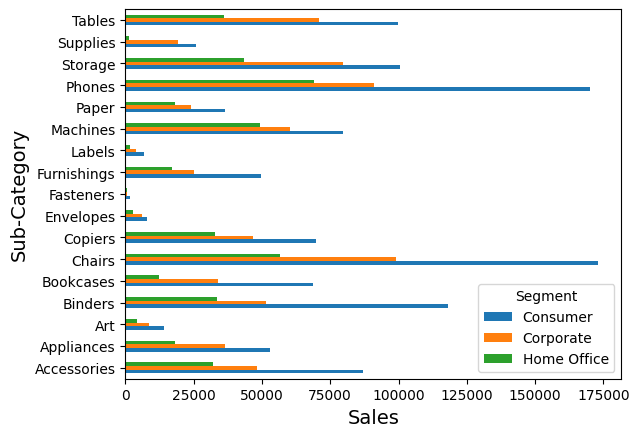

In [56]:
Sales_SC_Seg.plot(kind='barh')
plt.xlabel('Sales',fontsize=14)
plt.ylabel('Sub-Category',fontsize=14)
plt.show()

# MultiVirate Analysis

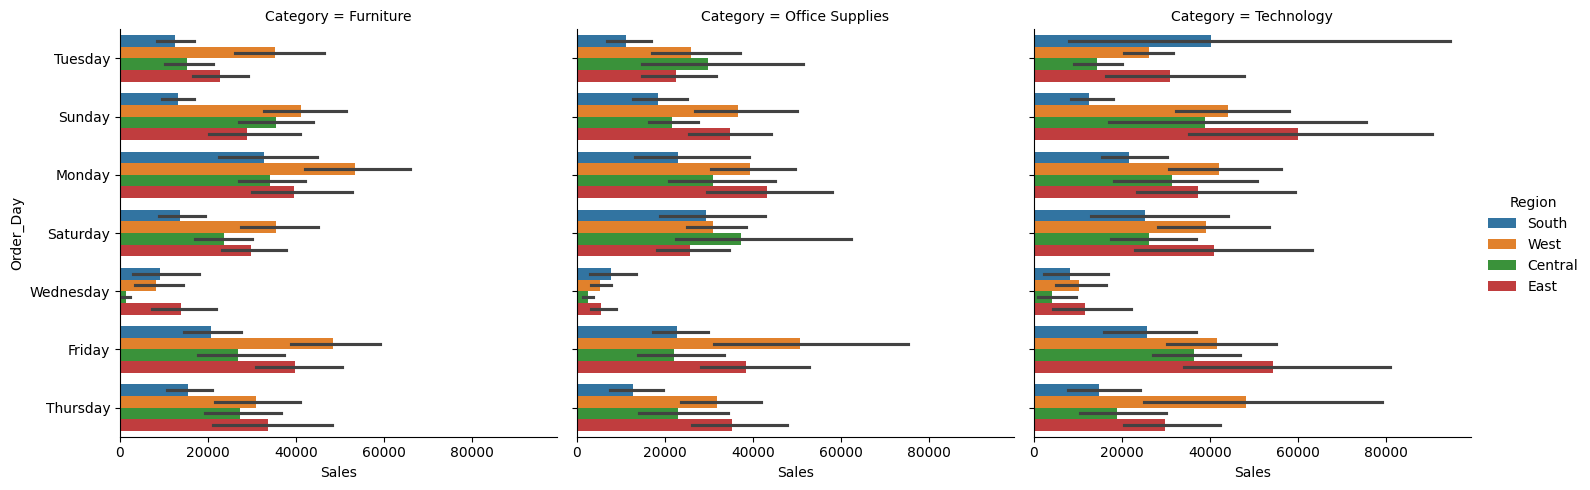

In [57]:
sns.catplot(x=df['Sales'],y='Order_Day',data=df,hue='Region',kind='bar',estimator=np.sum,col='Category')
plt.show()

In [58]:
df.corr(numeric_only=True)['Profit'].sort_values(ascending=False)

Profit           1.000000
Sales            0.479064
Product_Price    0.468312
Quantity         0.066253
Row ID           0.012497
Delivery Time   -0.004649
Postal Code     -0.029961
Discount        -0.219487
Cost            -0.247897
Name: Profit, dtype: float64

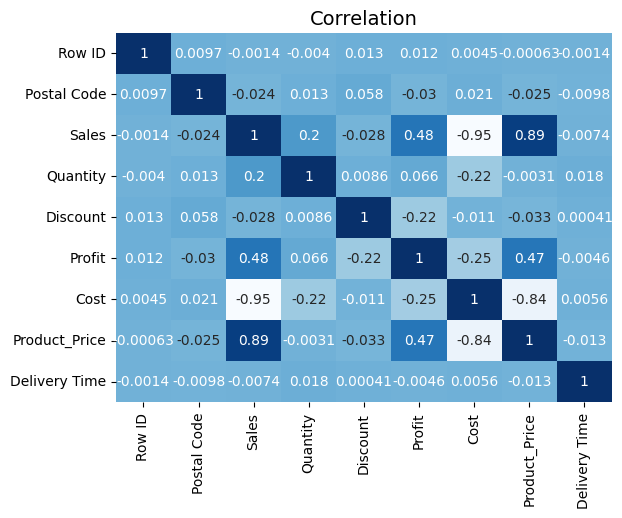

In [59]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues',cbar=False)
plt.title('Correlation',fontsize=14)
plt.show()

# Spliting The Data Set

In [60]:
Ship_Order={
            'Standard Class':1,
             'Second Class':2,
               'First Class':3,
                'Same Day':4}
df['Ship Mode']=df['Ship Mode'].map(Ship_Order)

In [61]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Cost',
       'Product_Price', 'Delivery Time', 'Order_Month', 'Order_Day'],
      dtype='object')

In [62]:
Num_df=df.select_dtypes(include=['number'])
Num_df

,Row ID,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit,Cost,Product_Price,Delivery Time
0,1,2,42420,261.9600,2,0.00,41.9136,-220.046400,130.9800,3
1,2,2,42420,731.9400,3,0.00,219.5820,-512.358000,243.9800,3
2,3,2,90036,14.6200,2,0.00,6.8714,-7.748600,7.3100,4
3,4,1,33311,957.5775,5,0.45,-383.0310,-909.698625,191.5155,7
4,5,1,33311,22.3680,2,0.20,2.5164,-15.378000,11.1840,7
...,...,...,...,...,...,...,...,...,...,...
9989,9990,2,33180,25.2480,3,0.20,4.1028,-16.095600,8.4160,2
9990,9991,1,92627,91.9600,2,0.00,15.6332,-76.326800,45.9800,5
9991,9992,1,92627,258.5760,2,0.20,19.3932,-187.467600,129.2880,5
9992,9993,1,92627,29.6000,4,0.00,13.3200,-16.280000,7.4000,5


In [64]:
X=Num_df.drop(['Row ID','Postal Code','Delivery Time','Profit'],axis=1)
y=Num_df['Profit']

In [67]:
X.shape,y.shape

((9994, 6), (9994,))

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7995, 6), (7995,), (1999, 6), (1999,))

In [78]:
scaler=StandardScaler()

In [81]:
X_train_final=scaler.fit_transform(X_train)
X_test_final=scaler.transform(X_test)


# Building Models

## Linear Regression

In [83]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_final,y_train)

LinearRegression()

### Train Evaluation

In [84]:
y_train_pred_lin=lin_reg.predict(X_train_final)

In [89]:
rmse_train_lin=(mean_squared_error(y_train,y_train_pred_lin))**0.5
amse_train_lin=mean_absolute_error(y_train,y_train_pred_lin)


print(f'RMSE  Train By Linear -----> {rmse_train_lin:0.2f} ')
print(f'AMSE  Train By Linear -----> {amse_train_lin:0.2f} ')


RMSE  Train By Linear -----> 84.35 
AMSE  Train By Linear -----> 30.40 


### Test Evaluation

In [86]:
y_test_pred_lin=lin_reg.predict(X_test_final)


In [88]:
rmse_test_lin=(mean_squared_error(y_test,y_test_pred_lin))**0.5
amse_test_lin=mean_absolute_error(y_test,y_test_pred_lin)


print(f'RMSE  test By Linear -----> {rmse_test_lin:0.2f} ')
print(f'AMSE  test By Linear -----> {amse_test_lin:0.2f} ')


RMSE  test By Linear -----> 233.53 
AMSE  test By Linear -----> 36.66 


## SGDRegression

In [109]:
sgd_reg=SGDRegressor(alpha=0.001,eta0=0.001,max_iter=10000)
sgd_reg.fit(X_train_final,y_train)

SGDRegressor(alpha=0.001, eta0=0.001, max_iter=10000)

### Train Evaluation

In [110]:
y_sgd_train_pred=sgd_reg.predict(X_train_final)
rmse_sgd_pred_train=(mean_squared_error(y_train,y_sgd_train_pred))**0.5
abs_sgd_pred_train=mean_absolute_error(y_train,y_sgd_train_pred)


print(f'RMSE for sgd Train Data ---> {rmse_sgd_pred_train:.2f}')
print(f'AMSE for sgd Train Data ---> {abs_sgd_pred_train:.2f}')


RMSE for sgd Train Data ---> 85.74
AMSE for sgd Train Data ---> 30.92


### Test Evaluation

In [111]:
y_sgd_pred_test=sgd_reg.predict(X_test_final)
rmse_sgd_pred_test=(mean_squared_error(y_test,y_sgd_pred_test))**0.5
abs_sgd_pred_test=mean_absolute_error(y_test,y_sgd_pred_test)


print(f'RMSE forsgd test Data ---> {rmse_sgd_pred_test:.2f}')
print(f'AMSE for sgd test Data ---> {abs_sgd_pred_test:.2f}')


RMSE forsgd test Data ---> 226.99
AMSE for sgd test Data ---> 37.49


## Random Forest

In [121]:
rf_reg=RandomForestRegressor(n_estimators=150,max_depth=7,n_jobs=-1,random_state=42,max_samples=0.8)
rf_reg.fit(X_train_final,y_train)

RandomForestRegressor(max_depth=7, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

### Train Evaluation

In [122]:
y_rf_pred_train=rf_reg.predict(X_train_final)
rmse_rf_pred_train=(mean_squared_error(y_train,y_rf_pred_train))**0.5
abs_rf_pred_train=mean_absolute_error(y_train,y_rf_pred_train)
r2s_rf_pred_train=r2_score(y_train,y_rf_pred_train)
print(f'RMSE For Train Data-->{rmse_rf_pred_train:0.2f}')
print(f'AMSE For Train Data-->{abs_rf_pred_train:0.2f}')


RMSE For Train Data-->70.44
AMSE For Train Data-->25.84


### Test Evaluation

In [123]:
y_rf_pred_test=rf_reg.predict(X_test_final)
rmse_rf_pred_test=(mean_squared_error(y_test,y_rf_pred_test))**0.5
abs_rf_pred_test=mean_absolute_error(y_test,y_rf_pred_test)


print(f'RMSE for rf test Data ---> {rmse_rf_pred_test:.2f}')
print(f'AMSE for rf test Data ---> {abs_rf_pred_test:.2f}')


RMSE for rf test Data ---> 223.41
AMSE for rf test Data ---> 36.85


## XGBOOST

In [125]:
xgb_reg=XGBRegressor(n_estimators=150,max_depth=8,learning_rate=0.1,subsample=0.8,n_jobs=-1, random_state=42)
xgb_reg.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

### Train Evaluation

In [129]:
y_xgb_pred_train=xgb_reg.predict(X_train_final)
rmse_xgb_pred_train=(mean_squared_error(y_train,y_xgb_pred_train))**0.5
abs_xgb_pred_train=mean_absolute_error(y_train,y_xgb_pred_train)

print(f'RMSE For Train Data-->{rmse_xgb_pred_train:0.2f}')
print(f'AMSE For Train Data-->{abs_xgb_pred_train:0.2f}')


RMSE For Train Data-->39.39
AMSE For Train Data-->3.72


### Test Evaluation

In [130]:
y_xgb_pred_test=xgb_reg.predict(X_test_final)
rmse_xgb_pred_test=(mean_squared_error(y_test,y_xgb_pred_test))**0.5
abs_xgb_pred_test=mean_absolute_error(y_test,y_xgb_pred_test)


print(f'RMSE for rf test Data ---> {rmse_xgb_pred_test:.2f}')
print(f'AMSE for rf test Data ---> {abs_xgb_pred_test:.2f}')


RMSE for rf test Data ---> 219.54
AMSE for rf test Data ---> 20.54
